In [80]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [32]:
# Read Data
raw = pd.read_csv('COMP90089_data_V1.csv')
# Rename some column names
raw = raw.rename(columns={'avg_result_value':'BMI_mean'})
raw

,subject_id,stay_id,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,BMI_mean
0,16006168,35290845,224,20,0,0,80.785714,124.714286,118.600000,65.235294,98.588235,13.882353,36.930000,26,3,1.174595,29.600000
1,14456100,39238130,644,22,0,0,69.944444,126.500000,231.200000,83.105263,99.789474,16.684211,36.380000,26,5,0.825775,35.500000
2,10352416,35043893,531,23,1,0,64.169118,119.661765,275.352941,154.028986,83.698413,25.584615,39.725000,158,5,11.636042,30.553932
3,10008454,31959184,246,26,0,1,66.153846,136.923077,204.800000,112.120000,95.480000,19.160000,36.942857,33,3,4.983889,30.553932
4,19325858,37778085,438,33,0,1,69.029412,121.676471,96.000000,96.892857,99.206897,16.933333,36.956000,35,5,2.122569,25.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14053,19149321,38493497,691,53,1,0,58.603448,91.965517,232.000000,112.568966,90.555556,29.500000,36.810455,115,5,12.835498,30.553932
14054,17910586,35322014,201,60,1,1,53.125000,126.875000,173.166667,82.708333,93.360000,20.440000,36.713333,34,3,3.399028,33.533333
14055,17332963,31798293,271,91,1,0,37.692308,96.846154,215.285714,71.296296,99.653846,18.451613,36.685000,60,3,1.268866,30.553932
14056,18451791,32688519,246,57,0,0,78.361111,149.083333,211.600000,73.125000,96.600000,17.025000,37.071667,26,3,1.250220,31.890909


In [39]:
df[['los']]

,los
0,1.174595
1,0.825775
2,11.636042
3,4.983889
4,2.122569
...,...
14053,12.835498
14054,3.399028
14055,1.268866
14056,1.250220


In [62]:
# Data pre-processing
df = raw.iloc[:, 2:]
kmeans = KMeans(n_clusters=3, random_state=0)
df['label'] = kmeans.fit_predict(df[['los']])
kmeans.cluster_centers_

array([2.24181797])

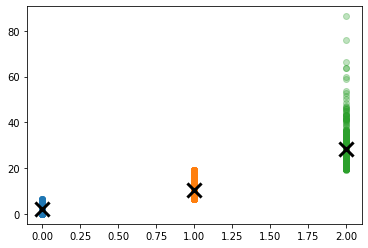

In [67]:
fig, ax = plt.subplots()
for label in range(3):
    y = df[df['label'] == label]['los']
    ax.scatter(np.repeat(label, len(y)), y, alpha=0.3, label=label)
    center_y = y.mean()
    ax.scatter(label, kmeans.cluster_centers_[label],
    marker="x",
    s=200,
    linewidths=3,
    color="black"
    )

In [72]:
label_df = df.drop(labels='los', axis=1)
label_df

,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,BMI_mean,label
0,224,20,0,0,80.785714,124.714286,118.600000,65.235294,98.588235,13.882353,36.930000,26,3,29.600000,0
1,644,22,0,0,69.944444,126.500000,231.200000,83.105263,99.789474,16.684211,36.380000,26,5,35.500000,0
2,531,23,1,0,64.169118,119.661765,275.352941,154.028986,83.698413,25.584615,39.725000,158,5,30.553932,1
3,246,26,0,1,66.153846,136.923077,204.800000,112.120000,95.480000,19.160000,36.942857,33,3,30.553932,0
4,438,33,0,1,69.029412,121.676471,96.000000,96.892857,99.206897,16.933333,36.956000,35,5,25.100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14053,691,53,1,0,58.603448,91.965517,232.000000,112.568966,90.555556,29.500000,36.810455,115,5,30.553932,1
14054,201,60,1,1,53.125000,126.875000,173.166667,82.708333,93.360000,20.440000,36.713333,34,3,33.533333,0
14055,271,91,1,0,37.692308,96.846154,215.285714,71.296296,99.653846,18.451613,36.685000,60,3,30.553932,0
14056,246,57,0,0,78.361111,149.083333,211.600000,73.125000,96.600000,17.025000,37.071667,26,3,31.890909,0


In [78]:
# Data split
X = label_df.loc[:, label_df.columns != 'label']
y = label_df.loc[:, label_df.columns == 'label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=89)

In [79]:
X_train

,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,BMI_mean
8603,655,56,0,1,71.478261,118.782609,258.789474,109.923077,99.269231,19.666667,36.989091,49,5,30.553932
5425,979,52,0,0,71.944444,120.111111,232.617647,85.888889,97.611111,14.500000,36.722000,43,5,21.523077
5210,302,46,0,1,60.136364,108.500000,136.727273,85.136364,96.818182,20.590909,36.808571,77,3,30.553932
11379,222,46,0,1,55.129310,105.818966,183.250000,77.526316,99.666667,14.896552,37.045000,52,3,30.553932
8339,314,73,1,1,69.685185,113.296296,187.777778,67.576923,99.560000,22.096154,34.000000,39,3,30.553932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,473,52,0,0,82.040000,141.600000,179.588235,75.400000,98.920000,13.840000,36.776667,29,5,21.523077
8726,323,87,0,1,71.307692,164.615385,217.500000,74.529412,97.875000,18.611111,36.568000,59,3,30.553932
2925,209,70,1,1,61.333333,128.666667,209.000000,71.538462,95.307692,19.730769,36.890000,82,3,31.500000
6276,438,33,1,1,70.285714,100.071429,269.772727,120.153846,97.869565,22.469697,32.233333,86,5,30.553932
